In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline



In [2]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()




In [3]:
# Split the dataset into features and target
X = iris_dataset['data']
y = iris_dataset['target']



In [4]:
# --- Preprocessing: Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("First 5 rows of scaled data:\n", X_scaled[:5])



First 5 rows of scaled data:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [5]:
# --- Feature Engineering: Polynomial Features ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
print("Shape of data after Polynomial Features:", X_poly.shape)



Shape of data after Polynomial Features: (150, 14)


In [6]:
# --- Feature Selection: SelectKBest ---
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_poly, y)
print("Shape of data after SelectKBest:", X_selected.shape)



Shape of data after SelectKBest: (150, 2)


In [9]:
# --- One-Hot Encoding for Target ---
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_one_hot = one_hot_encoder.fit_transform(y.reshape(-1, 1))
print("First 5 rows of one-hot encoded target:\n", y_one_hot[:5])

First 5 rows of one-hot encoded target:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


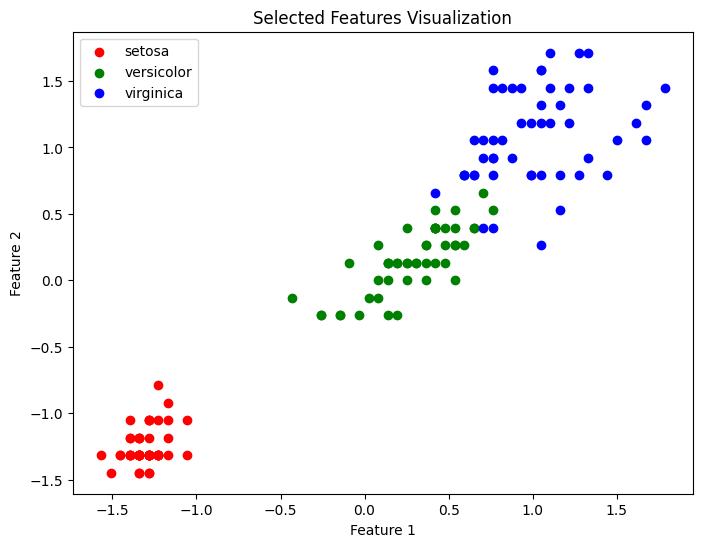

In [10]:
# --- Visualize Features After Selection ---
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris_dataset['target_names']):
    plt.scatter(X_selected[y == target, 0], X_selected[y == target, 1], color=color, label=label)
plt.title('Selected Features Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



In [11]:
# --- Build a Simple Pipeline ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('selector', SelectKBest(score_func=f_classif, k=2))
])



In [12]:
# Apply the pipeline
X_transformed = pipeline.fit_transform(X, y)
print("Shape of data after Pipeline:", X_transformed.shape)



Shape of data after Pipeline: (150, 2)


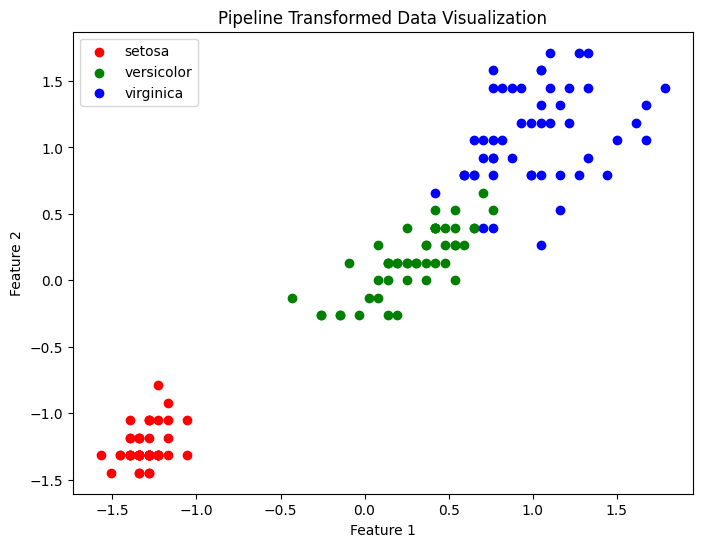

In [13]:
# Visualize transformed data
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris_dataset['target_names']):
    plt.scatter(X_transformed[y == target, 0], X_transformed[y == target, 1], color=color, label=label)
plt.title('Pipeline Transformed Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()